<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Import the libraries we need</p>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Set the Variables</p>

In [35]:
csvPath = r'C:\Users\dpery\Documents\research\MMA_TCE_Polymer\DSC_Data\csvs\csvs_edited\MMA_80_TTE_20_film_DCM_solvent_Run_1b.csv'
line1Min = 70
line1Max = 95
line2Min = 150
line2Max = 180
line3Min = 225
line3Max = 240
MMApercent=80
TCEpercent=20
MMA_Mass_Percent = 69.88847583643121
run = "001"
startingMass = 0
MMA_Percent_String = "80"
TCE_Percent_String = "20"




<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Read the csv file. We see here that fullData is assigned the DataFrame type. Let's view the top of it with head.</p>

In [36]:
#Be sure to save the file in Unicode UTF-8 format, or specify the format if you are getting an error here.
fullData = pd.read_csv(csvPath, sep = ',', encoding="utf-8-sig")
print(type(fullData))
fullData.head(15)
#fullData

<class 'pandas.core.frame.DataFrame'>


,Time_min,Temp_C,Mass_mg,Heat_Flow_mW
0,0.000611,51.53172,13.18631,14.20503
1,0.004167,51.52012,13.18627,14.20252
2,0.012500,51.50810,13.18624,14.20024
3,0.020833,51.49170,13.18624,14.19919
4,0.029167,51.47564,13.18618,14.19838
5,0.037500,51.46593,13.18618,14.19757
6,0.045833,51.45533,13.18614,14.19436
7,0.054167,51.43184,13.18612,14.19312
8,0.062500,51.42336,13.18604,14.18956
9,0.070833,51.40969,13.18609,14.18776


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Column labels can be viewed with the column command.</p>

In [37]:
fullData.columns

Index(['Time_min', 'Temp_C', 'Mass_mg', 'Heat_Flow_mW'], dtype='object')

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Observe that the index is automatically assigned from 0 to the end. Here we have 1650 data points.</p>

In [38]:
fullData.index


RangeIndex(start=0, stop=1650, step=1)

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Begin assignment of data for Regression of Line1</p>

In [39]:
line1Mask = (line1Min < fullData['Temp_C']) & (fullData['Temp_C'] < line1Max )
line1 = fullData[line1Mask]
line1.shape
#line1

(135, 4)

In [40]:
line1.columns

Index(['Time_min', 'Temp_C', 'Mass_mg', 'Heat_Flow_mW'], dtype='object')

In [41]:
# Create a mask for the temp and mass to apply to the dataset to select the column
x_temp_col = ['Temp_C']
y_mass_col = ['Mass_mg']

In [42]:
# Apply the mask for line 1 X
x1_temp = line1[x_temp_col]
#x1_temp

In [43]:
# Apply the mas for line 1 Y
y1_mass = line1[y_mass_col]
#y1_mass

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Begin assignment of data for Regression of Line2</p>

In [44]:
line2Mask = (line2Min < fullData['Temp_C']) & (fullData['Temp_C'] < line2Max)
line2 = fullData[line2Mask]
line2.shape
#line2

(177, 4)

In [45]:
# Apply the mask for line 2 X
x2_temp = line2[x_temp_col]
#x2_temp

In [46]:
# Apply the mask for line 2 Y
y2_mass = line2[y_mass_col]
#y2_mass

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Begin assignment of data for Regression of Line3</p>

In [47]:
line3Mask = (line3Min < fullData['Temp_C']) & (fullData['Temp_C'] < line3Max)
line3 = fullData[line3Mask]
line3.shape
#line3

(87, 4)

In [48]:
# Apply the mask for line 3 X
x3_temp = line3[x_temp_col]
#x3_temp

In [49]:
# Apply the mask for line 3 Y
y3_mass = line3[y_mass_col]
#y3_mass

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Begin assignment of data for entire graph</p>

In [50]:
full_x_temp = fullData[x_temp_col]
#full_x_temp
full_y_mass = fullData[y_mass_col]
startingMass = full_y_mass.loc[0]
startingMass
#full_y_mass

Mass_mg    13.18631
Name: 0, dtype: float64

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Linear Regression for Line 1</p>

In [51]:
regressor1 = LinearRegression()
regressor1.fit(x1_temp, y1_mass)
regressor1.score(x1_temp, y1_mass)
# Print the coefficient(s)
print('Coefficient (m1): \n', regressor1.coef_)
#assign the coefficent to m1 for the slope of line 1
m1 = regressor1.coef_
# Print the intercept
print('Intercept: \n', regressor1.intercept_)
#assign the intercept to b1 for the slope of b1
b1 = regressor1.intercept_


Coefficient (m1): 
 [[-0.00063508]]
Intercept: 
 [13.23828923]


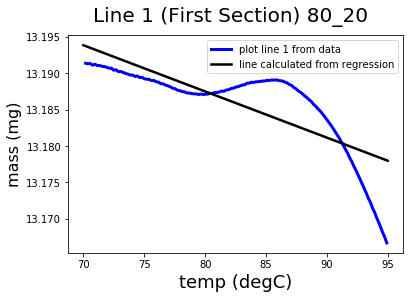

In [52]:
# Plot Line 1 from data and slope/intercept
fig1 = plt.figure()
plt.plot(x1_temp, y1_mass, color='blue', linewidth=3, label="plot line 1 from data")
fig1.suptitle('Line 1 (First Section) ' + MMA_Percent_String + '_' + TCE_Percent_String , fontsize=20)
plt.xlabel('temp (degC)', fontsize=18)
plt.ylabel('mass (mg)', fontsize=16)

#fit function for line 1. Need to manually add the slope at this time
f = lambda x: -0.00063508*x + b1
# x values of line to plot
x = np.array([line1Min, line1Max])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="line calculated from regression")

fig1.savefig('line1plot' + MMA_Percent_String + TCE_Percent_String + '.jpg' )

plt.legend()
plt.show()

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Linear Regression for Line 2</p>

In [53]:
regressor2 = LinearRegression()
regressor2.fit(x2_temp, y2_mass)
regressor2.score(x2_temp, y2_mass)
# Print the coefficient(s)
print('Coefficient (m2): \n', regressor2.coef_)
#assign the coefficent to m2 for the slope of line 2
m2 = regressor2.coef_
# Print the intercept
print('Intercept: \n', regressor2.intercept_)
#assign the intercept to b2 for the slope of b2
b2 = regressor2.intercept_

Coefficient (m2): 
 [[-0.02891316]]
Intercept: 
 [16.71104614]


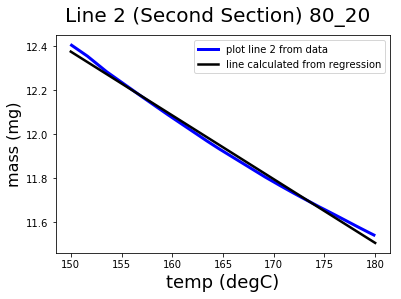

In [54]:
# Plot Line 2 from data and slope/intercept
fig2 = plt.figure()
plt.plot(x2_temp, y2_mass, color='blue', linewidth=3, label="plot line 2 from data")
fig2.suptitle('Line 2 (Second Section) ' + MMA_Percent_String + '_' + TCE_Percent_String , fontsize=20)
plt.xlabel('temp (degC)', fontsize=18)
plt.ylabel('mass (mg)', fontsize=16)

#fit function Need to manually add the slope at this time
f = lambda x: -0.02891316*x + b2
# x values of line to plot
x = np.array([line2Min, line2Max])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="line calculated from regression")

fig2.savefig('line2plot'  + MMA_Percent_String + TCE_Percent_String + '.jpg')

plt.legend()
plt.show()

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Linear Regression for Line 3</p>

In [55]:
regressor3 = LinearRegression()
regressor3.fit(x3_temp, y3_mass)
regressor3.score(x3_temp, y3_mass)
# Print the coefficient(s)
print('Coefficient (m3): \n', regressor3.coef_)
#assign the coefficent to m2 for the slope of line 2
m3 = regressor3.coef_
# Print the intercept
print('Intercept: \n', regressor3.intercept_)
#assign the intercept to b2 for the slope of b3
b3 = regressor3.intercept_

Coefficient (m3): 
 [[-0.01350476]]
Intercept: 
 [13.74761341]


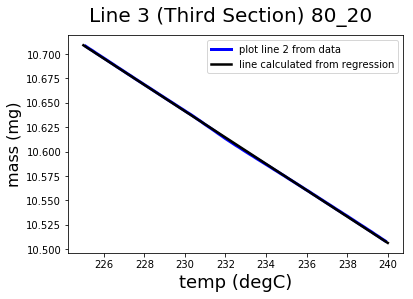

In [56]:
# Plot Line 3 from data and slope/intercept
fig3 = plt.figure()
plt.plot(x3_temp, y3_mass, color='blue', linewidth=3, label="plot line 2 from data")
fig3.suptitle('Line 3 (Third Section) ' + MMA_Percent_String + '_' + TCE_Percent_String, fontsize=20)
plt.xlabel('temp (degC)', fontsize=18)
plt.ylabel('mass (mg)', fontsize=16)

#fit function Need to manually add the slope at this time
f = lambda x: -0.01350476*x + b3
# x values of line to plot
x = np.array([line3Min, line3Max])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="line calculated from regression")

fig3.savefig('line3plot'+ MMA_Percent_String + TCE_Percent_String + '.jpg')

plt.legend()
plt.show()

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Calculate the intercept between lines 1 and 2</p>

In [57]:
y_mass_i = m1*(b2-b1)/(m1-m2) + b1
x_temp_i = (b2-b1)/(m1-m2)
print(x_temp_i, y_mass_i)

[[122.8073559]] [[13.160297]]


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Find the nearest initial mass from the array of masses and get the x and y</p>

In [58]:
y_mass_list = full_y_mass["Mass_mg"].tolist()
x_temp_list = full_x_temp["Temp_C"].tolist()

idx_smallesti = (np.abs(y_mass_list-y_mass_i)).argmin()
real_y_mass_i = y_mass_list[idx_smallesti]
real_x_temp_i = x_temp_list[idx_smallesti]


print(real_x_temp_i, real_y_mass_i)


96.4127 13.16055


In [59]:
#y_mass_list

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Calculate the intercept between lines 2 and 3</p>

In [60]:
y_mass_f = m2*(b3-b2)/(m2-m3) + b2
x_temp_f = (b3-b2)/(m2-m3)
print(x_temp_f, y_mass_f)

[[192.32575305]] [[11.15030023]]


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Find the nearest final mass from the array of masses</p>

In [61]:
#y_mass_list = full_y_mass["mass(mg)"].tolist()
#x_temp_list = full_x_temp["temp(degC)"].tolist()

idx_smallestf = (np.abs(y_mass_list - y_mass_f)).argmin()
real_y_mass_f = y_mass_list[idx_smallestf]
real_x_temp_f = x_temp_list[idx_smallestf]


print(real_x_temp_f, real_y_mass_f)

198.2516 11.152000000000001


In [62]:
print(m1, m2, m3)

[[-0.00063508]] [[-0.02891316]] [[-0.01350476]]


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Everything on one plot</p>

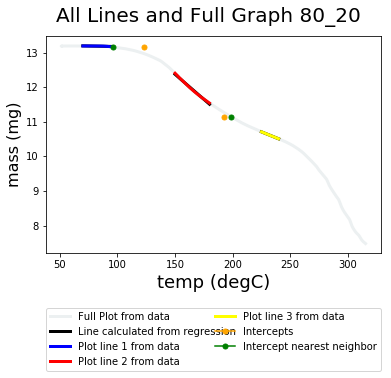

In [63]:
fig4 = plt.figure()
fig4.suptitle('All Lines and Full Graph '+ MMA_Percent_String + '_' + TCE_Percent_String, fontsize=20)
plt.xlabel('temp (degC)', fontsize=18)
plt.ylabel('mass (mg)', fontsize=16)

#plot the full function
plt.plot(full_x_temp, full_y_mass, color='#ECF0F1', linewidth=3, label="Full Plot from data")

#fit function for Line 1. Need to manually add the slope(m1) at this time.
f = lambda x: -0.00063508*x + b1
# x values of line to plot
x = np.array([line1Min, line1Max])
# plot fit
plt.plot(x,f(x),lw=3, c="k",label="Line calculated from regression")

# Plot Line 1 from data
plt.plot(x1_temp, y1_mass, color='blue', linewidth=3, label="Plot line 1 from data")

#fit function for Line 2. Need to manually add the slope (m2) at this time.
f = lambda x: -0.02891316*x + b2
# x values of line to plot
x = np.array([line2Min, line2Max])
# plot fit
plt.plot(x,f(x),lw=3, c="k")

# Plot Line 2 from data and slope/intercept
plt.plot(x2_temp, y2_mass, color='red', linewidth=3, label="Plot line 2 from data")

#fit function for Line 3. Need to manually add the slope (m3) at this time.
f = lambda x: -0.01350476*x + b3
# x values of line to plot
x = np.array([line3Min, line3Max])
# plot fit
plt.plot(x,f(x),lw=3, c="k")

# Plot Line 3 from data and slope/intercept
plt.plot(x3_temp, y3_mass, color='yellow', linewidth=3, label="Plot line 3 from data")

#plot the intercepts

plt.plot(x_temp_i, y_mass_i, color='orange', marker = "o", label="Intercepts", markersize=5)
plt.plot(x_temp_f, y_mass_f, color='orange', marker = "o", markersize=5)

#plot the intercepts nearest neighbor

plt.plot(real_x_temp_i, real_y_mass_i, color='green', marker = "o", label="Intercept nearest neighbor", markersize=5)
plt.plot(real_x_temp_f, real_y_mass_f, color='green', marker = "o", markersize=5)

fig4.savefig('lineplot_all' + MMA_Percent_String + TCE_Percent_String + '.jpg')

plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)

#plt.legend()
plt.show()



In [65]:
diff=(real_y_mass_i - real_y_mass_f)
#set MMA%, TCE% at top
#MMA_Mass_Percent = 83.92857142857143 Add to top
#run = "001" #set run num at top
rateOfMassLoss = diff/real_y_mass_i*100
rateOfMassLossOverPercentMMAbyMass = rateOfMassLoss/MMA_Mass_Percent*100
data = [[MMApercent, TCEpercent, MMA_Mass_Percent, run, startingMass, real_y_mass_i, real_y_mass_f, diff, rateOfMassLoss, rateOfMassLossOverPercentMMAbyMass]]
MMA_TCE_df = pd.DataFrame(data,columns=['MMApercent','TCEpercent', "MMA_Mass_Percent", "Run", "startingMass", "Mass_i_mg", "Mass_f_mg", "diff", "rateOfMassLoss", "rateOfMassLossOverPercentMMAbyMass"],dtype=float)
print (MMA_TCE_df)
#Create a csv file on the first run. Only run this once.
#MMA_TCE_df.to_csv(r'C:\Users\dpery\Documents\research\MMA_TCE_Polymer\DSC_Data\csvs\MMA_TCE_Analysis.csv')
#On the first dataset, set header = True, on subsequent, set header = False
with open(r'C:\Users\dpery\Documents\research\MMA_TCE_Polymer\DSC_Data\csvs\MMA_TCE_Analysis.csv', 'a') as f:
    MMA_TCE_df.to_csv(f, header=False)
    

   MMApercent  TCEpercent  MMA_Mass_Percent  Run  startingMass  Mass_i_mg  \
0        80.0        20.0         69.888476  1.0      13.18631   13.16055   

   Mass_f_mg     diff  rateOfMassLoss  rateOfMassLossOverPercentMMAbyMass  
0     11.152  2.00855         15.2619                           21.837506  


In [68]:
data2 = [[MMApercent,x_temp_i, y_mass_i, real_x_temp_i, real_y_mass_i, x_temp_f, y_mass_f, real_x_temp_f, real_y_mass_f]]
MMA_TCE_intercepts = pd.DataFrame(data2,columns=['MMApercent','x_temp_i', "y_mass_i", "real_x_temp_i", "real_y_mass_i", "x_temp_f", "y_mass_f", "real_x_temp_f", "real_y_mass_f"],dtype=float)
with open(r'C:\Users\dpery\Documents\research\MMA_TCE_Polymer\DSC_Data\csvs\MMA_TCE_Intercepts.csv', 'a') as f:
    MMA_TCE_intercepts.to_csv(f, header=False)

MMA_TCE_intercepts

,MMApercent,x_temp_i,y_mass_i,real_x_temp_i,real_y_mass_i,x_temp_f,y_mass_f,real_x_temp_f,real_y_mass_f
0,80.0,122.807356,13.160297,96.4127,13.16055,192.325753,11.1503,198.2516,11.152
